In [4]:
import importlib

from nucleosome_simulation import simulation
import matplotlib.pyplot as plt
import plot
importlib.reload(plot)
from plot import plot_nuc

In [2]:
nuc = simulation(5,5)

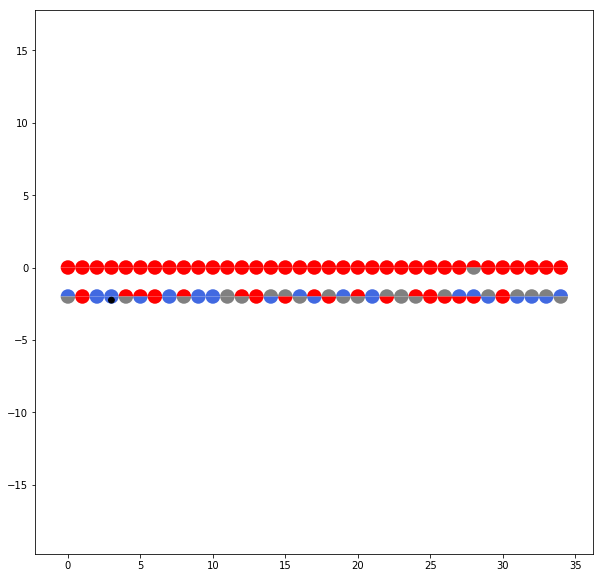

In [5]:
figure =plt.figure(0)
for i in range(len(nuc)):
    plot_nuc(nuc[i],-2*i,figure)
